In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import geopandas as gpd
import scipy.stats as sc

In [2]:
data = pd.read_csv('/home/slindhult/assignments/Capstone-1/Data/pollution_us_2000_2016.csv')

In [3]:
cols_list = ['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
a = data.copy()
purged = a[(a[['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour']] >=0).all(1)]

cleaned = purged.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'County', 'City', 'NO2 Units',
       'O3 Units',
       'SO2 Units',
       
       'CO Units'], axis=1)
cleaned['Date'] = cleaned['Date Local']

clean = cleaned.groupby(['Date Local', 'Address','State']).agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})
clean = clean.reset_index()
clean.drop(['Address'],axis=1)

,Date Local,State,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2000-01-01,Virginia,31.000000,41.0,23.0,39.0,0.002750,0.006,11.0,5.0,11.645834,16.8,10.0,26.0,1.244518,1.5000,2.5,16.0
1,2000-01-01,California,5.272727,19.0,17.0,18.0,0.025917,0.028,14.0,24.0,2.524026,5.5,17.0,10.0,0.270933,0.3000,5.0,3.0
2,2000-01-01,California,17.652174,27.0,2.0,25.0,0.019333,0.029,14.0,25.0,2.338961,3.0,8.0,4.0,0.447343,0.7000,4.0,7.0
3,2000-01-01,California,9.304348,24.0,7.0,23.0,0.032917,0.041,10.0,35.0,0.402795,2.3,9.5,4.0,0.466787,1.0000,9.0,9.0
4,2000-01-01,Louisiana,31.083333,72.0,18.0,70.0,0.023350,0.038,10.0,32.0,7.737500,12.3,2.0,21.0,0.845943,1.5000,20.5,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407552,2016-05-31,Iowa,5.390909,11.5,1.0,10.0,0.032895,0.042,10.0,39.0,0.077019,0.4,10.5,0.0,0.196568,0.2185,3.0,2.0
407553,2016-05-31,North Carolina,5.787500,12.6,21.0,11.0,0.034526,0.046,9.0,43.0,0.288509,0.8,21.5,1.0,0.193937,0.2240,10.0,2.0
407554,2016-05-31,Iowa,5.775000,16.8,20.0,15.0,0.035210,0.043,7.0,40.0,0.000000,0.0,1.0,0.0,0.208228,0.3850,20.5,3.0
407555,2016-05-31,Maine,4.404167,11.8,22.0,10.0,0.031842,0.043,9.0,40.0,0.062500,0.2,21.0,0.0,0.266583,0.3250,4.5,3.0


In [ ]:
lst2=[]

for col in clean.columns:
    lst2.append((col, clean[col].isnull().sum()))
lst2

In [ ]:
state = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [ ]:
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [ ]:
total = s[['NO2 AQI',
       'O3 AQI', 'SO2 AQI', 'CO AQI']].copy()

In [ ]:
contiguous_usa = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
contiguous_usa.head()

In [ ]:
contiguous_usa=contiguous_usa.rename(columns={'NAME': 'State'})


In [ ]:
merged.index

In [ ]:
merged = contiguous_usa.set_index('State').join(s2)


In [ ]:

merged = merged.loc[~merged.index.isin(['Alaska', 'Hawaii'])]


In [ ]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = merged.to_json())

In [ ]:

'''# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)
# Define custom tick labels for color bar.
tick_labels = {'0':'0','3': '3', '5': '5',
 '10':'10', '15':'15',
 '20':'20', '25':'25',
 '30':'30', '35':'35+'}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)'''

# Create figure object.
p = figure(title = 'Average Air Pollution Levels, 2000-2016', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan,wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   #fill_color = {'field':'NO2_AQI', 'transform': color_mapper},
                   line_color = 'black', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@index'),
                                ('NO2_AQI','NO2_AQI')]))
#p.add_layout(color_bar, 'below')
show(p)





In [ ]:
# Added bins for AQI rating scale
purged['SO2 AQI Level'] = pd.cut(purged['SO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['NO2 AQI Level'] = pd.cut(purged['NO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['O3 AQI Level'] = pd.cut(purged['O3 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['CO AQI Level'] = pd.cut(purged['CO AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])

In [ ]:
#purged['Date Local']=pd.to_datetime(purged['Date Local'])

In [ ]:
purged.head()

In [ ]:
aqi = purged[['Date Local','SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']]

In [ ]:
aqi['year'] = aqi['Date Local'].apply(lambda x: x[:4])

In [ ]:
aqi.drop(['Date Local'],axis=1)

In [ ]:
test = aqi.agg({'SO2 AQI Level':'value_counts','NO2 AQI Level':'value_counts','O3 AQI Level':'value_counts','CO AQI Level':'value_counts'})

In [ ]:
groups = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous']
cols = [O2 AQI Leve]
test_list = []
for col in cols:
    for i in groups:
        test_list.append((col, aqi[col].value_counts()))

In [ ]:
test.head()

In [ ]:
test.index

In [ ]:
#year by year number of grouped days
fig, axs = plt.subplots(4,1,figsize=(20,20))

cols = ['SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']
axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].bar(test.index,test[col], width=.8,)
    axs[i].set_title(col)
    axs[i].set_yscale('log')
fig.tight_layout() 

In [ ]:
test.plot.bar();
plt.ylabel('Log Days in Category')
plt.yscale('log')

In [ ]:
cols = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
fig, axs = plt.subplots(16,1,figsize=(10,20))

axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].plot(s.index,s[col])
    axs[i].set_title(col)
    axs[i].set_xticklabels(labels=s.index,rotation=45)


In [ ]:
purged['year'] = purged['Date Local'].apply(lambda x: x[:4])

In [ ]:
year = purged[['State',
         'NO2 Mean', 'NO2 AQI',
       'O3 Mean','O3 AQI',
       'SO2 Mean','SO2 AQI',
        'CO Mean','CO AQI', 'year']].copy()

In [ ]:
# Mean pollutants
y = year.groupby(['year','State']).agg({'NO2 Mean':'mean',
       'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO AQI':'mean'})

In [ ]:
states=year['State'].unique()

In [ ]:
for state in states:
    state = year[(year[['State']]==state).any(1)]

In [ ]:
state = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [ ]:
# Mean pollutants
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [ ]:
montana = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
vermont = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
mississippi = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
add_states = pd.DataFrame([montana, vermont, mississippi],index = ['Montana', 'Vermont', 'Mississippi'])
add_states

add_states = add_states.rename(columns={0:'NO2 Mean', 1:'NO2 1st Max Value', 2:'NO2 1st Max Hour', 3:'NO2 AQI',
       4:'O3 Mean', 5:'O3 1st Max Value', 6:'O3 1st Max Hour', 7:'O3 AQI', 8:'SO2 Mean',
       9:'SO2 1st Max Value', 10:'SO2 1st Max Hour', 11:'SO2 AQI', 12:'CO Mean',
       13:'CO 1st Max Value', 14:'CO 1st Max Hour', 15:'CO AQI'})

In [ ]:
s2 = s.append(add_states)


In [ ]:
joined = joined.loc[~joined.index.isin(['Alaska', 'Hawaii'])]

In [ ]:
s2['Total'] = s2['NO2 AQI'] + s2['O3 AQI'] + s2['CO AQI'] + s2['SO2 AQI']

In [ ]:
s2.sort_values('Total', ascending=False)

In [ ]:
month = clean.copy()
month['Date Local'] = pd.to_datetime(month['Date Local'], format="%Y-%m-%d")

In [ ]:
month.info()

In [ ]:
month=month.groupby([(month['Date Local'].dt.year),(month['Date Local'].dt.month)]).mean()

In [ ]:
month = month.reset_index(1)



In [ ]:
month.rename(columns={'Date Local': 'Month'}, inplace=True)

In [ ]:
month = month.reset_index()

In [ ]:
month.rename(columns={'Date Local': 'Year'}, inplace=True)

In [ ]:
month.columns

In [ ]:
columns = ['NO2 Mean']


fig, ax = plt.subplots(figsize=(10,10))

for i in range(2000,2016):
    df = month[(month[['Year']] == i).any(1)]
    for col in columns:
        ax.plot(df['Month'],df[col], label=i)




ax.legend()

fig.tight_layout() 

In [ ]:
columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']


fig, axs = plt.subplots(16,1, figsize=(10,30))


for i in range(2000,2016,2):
    df = month[(month[['Year']] == i).any(1)]
    for i, col in enumerate(columns):
        axs[i].plot(df['Month'],df[col], label=i)
        axs[i].set_xlabel('Month')
        axs[i].set_ylabel(col)




ax.legend()

fig.tight_layout() 

In [ ]:
pd.plotting.autocorrelation_plot(month["NO2 Mean"].resample("1m").median())

In [ ]:
dt = clean.copy()
dt['Date Local'] = pd.to_datetime(dt['Date Local'], format="%Y-%m-%d")

In [ ]:
pd.plotting.autocorrelation_plot(dt["NO2 Mean"].resample("1m").median())

In [ ]:
dt.index = dt['Date Local']

In [ ]:
import numpy as np
np.corrcoef((clean['NO2 Mean'], clean['NO2 1st Max Value'], clean['NO2 1st Max Hour'],
       clean['NO2 AQI'], clean['O3 Mean'], clean['O3 1st Max Value'], clean['O3 1st Max Hour'], clean['O3 AQI'],
       clean['SO2 Mean'], clean['SO2 1st Max Value'], clean['SO2 1st Max Hour'], clean['SO2 AQI'],
      clean['CO Mean'], clean['CO 1st Max Value'], clean['CO 1st Max Hour'], clean['CO AQI'])

In [ ]:
import seaborn as sns
corr = clean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(25, 255, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
columns = ['NO2 Mean']
m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(10,10))

for i in range(2000,2016):
    df = month[(month[['Year']] == i).any(1)]
    for col in columns:
        ax.plot(df['Month'],df[col], label=i)
        plt.xticks([], [])
        ax.set_xticklabels(labels=m)
ax.grid()




ax.legend()

fig.tight_layout() 

In [ ]:
month = clean.copy()
month['Date Local'] = pd.to_datetime(month['Date Local'], format="%Y-%m-%d")

month = month.groupby([(month['Date Local'].dt.month)]).mean()




In [ ]:
month

In [ ]:
columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']


fig, axs = plt.subplots(4,4, figsize=(12,12))
axs=axs.flatten()

for i, col in enumerate(columns):
    axs[i].plot(df['Month'],df[col], label=i)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel(col)
    axs[i].set_facecolor('#F5F5F5')
    axs[i].grid()
    axs[i].set_title(col)
    axs[i].set_xticks(np.linspace(1,12,12))
    axs[i].set_xticklabels(m, rotation=90)



ax.legend()

fig.tight_layout() 

In [7]:
g = clean.copy()

In [8]:
g['year'] = g['Date Local'].apply(lambda x: x[0:4])
g['month']=g['Date Local'].apply(lambda x: x[5:7])
g = g[(g[['year']] == '2015').any(1)]
g = g.drop(['Date Local', 'Address'], axis=1)
g = g.groupby(['State','month']).mean()

g=g.reset_index(1)

In [9]:
g

,month,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
State,,,,,,,,,,,,,,,,,
Alabama,01,13.916667,22.900000,21.000000,21.000000,0.014167,0.023000,9.000000,21.000000,1.466667,2.500000,7.000000,3.000000,0.234706,0.335000,6.000000,3.000000
Alabama,03,8.370381,19.275000,13.214286,17.678571,0.025825,0.036607,10.714286,33.928571,1.242529,5.633929,10.892857,8.964286,0.205557,0.365714,9.017857,3.357143
Alabama,04,8.267380,22.364286,13.214286,20.714286,0.027034,0.039214,10.285714,36.428571,0.587681,2.594643,10.053571,4.321429,0.201441,0.334821,10.696429,3.250000
Alabama,05,10.540388,26.707143,14.250000,24.678571,0.028975,0.048464,8.642857,53.035714,2.109294,7.751786,10.410714,13.214286,0.221375,0.376250,9.089286,3.857143
Alabama,06,8.354787,21.262069,12.793103,19.551724,0.027572,0.045241,8.758621,44.827586,0.992772,4.744828,10.706897,7.793103,0.200220,0.362241,9.586207,3.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,08,4.188723,14.009677,11.774194,12.709677,0.042951,0.053419,9.032258,54.064516,0.508365,3.033871,13.000000,5.566667,0.086393,0.140903,8.354839,1.258065
Wyoming,09,3.863640,13.013333,12.133333,11.900000,0.037989,0.046867,9.366667,44.200000,0.590543,2.516667,13.466667,3.933333,0.054481,0.103400,10.300000,0.933333
Wyoming,10,4.131767,12.664516,12.387097,11.645161,0.030856,0.039129,8.967742,36.258065,0.464009,2.179032,11.129032,3.612903,0.053285,0.106323,8.080645,1.000000


In [75]:
total = g.copy()
total['Month'] = total['month'].astype(int)
total = total.set_index(total['Month'], append=True)

In [76]:
total = total.drop(['month'],axis=1)

In [77]:
map_df = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
statelist = map_df['NAME']
states_repeat = statelist.repeat(12)
nums_repeat= [i for i in range(1,13)]*52
master_states = pd.DataFrame(states_repeat)
master_states['Month'] = nums_repeat
master_states = master_states.set_index('NAME')

In [78]:
joined = map_df.set_index('NAME').join(master_states, how='left')
joined['month']=joined['Month']
joined = joined.set_index(joined['month'],append=True)
joined.index.names= ['State', 'Month']
joined = joined.drop(['Month','month'],axis=1)
joined

STATEFP   STATENS     AFFGEOID GEOID STUSPS LSAD         ALAND  \
State   Month                                                                  
Alabama 1          01  01779775  0400000US01    01     AL   00  131174048583   
        2          01  01779775  0400000US01    01     AL   00  131174048583   
        3          01  01779775  0400000US01    01     AL   00  131174048583   
        4          01  01779775  0400000US01    01     AL   00  131174048583   
        5          01  01779775  0400000US01    01     AL   00  131174048583   
...               ...       ...          ...   ...    ...  ...           ...   
Wyoming 8          56  01779807  0400000US56    56     WY   00  251458544898   
        9          56  01779807  0400000US56    56     WY   00  251458544898   
        10         56  01779807  0400000US56    56     WY   00  251458544898   
        11         56  01779807  0400000US56    56     WY   00  251458544898   
        12         56  01779807  0400000US56    56     WY   00  251458544898   

                   AWATER                                           geometry  
State   Month                                                                 
Alabama 1      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
        2      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
        3      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
        4      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
        5      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
...                   ...                                                ...  
Wyoming 8      1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  
        9      1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  
        10     1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  
        11     1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  
        12     1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  

[624 rows x 9 columns]

In [93]:
df2015 = joined.join(total)

In [108]:
df2015['Total AQI'].max()

117.73333333333332

In [95]:
df2015 = df2015.drop(['Month'],axis=1)
df2015 = df2015.reset_index()
df2015 = df2015.fillna(0)

In [103]:
df2015['Total AQI'] = df2015['O3 AQI'] + df2015['CO AQI'] + df2015['SO2 AQI'] + df2015['NO2 AQI']

In [125]:
df2015 = df2015[~((df2015['State'] == 'Alaska') | (df2015['State']== 'Hawaii') | (df2015['State']== 'Puerto Rico'))]

In [ ]:
joined = map_df.set_index('NAME').join(master_states, how='left')


In [ ]:
# read in a shapefile
map_df = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')

In [142]:
def plot_month(df, month, variable):
    df[(df['Month'] == month)]

    vmin, vmax = 0,120 
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(12, 8))
    df2015.plot(column=variable, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8');
    ax.axis('off')
    
    d = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7: 'Jul',8: 'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

    # add a title
    ax.set_title(f'{variable} Emissions {d[]} 2015', fontdict={'fontsize': '25', 'fontweight' : '3'})
    # add annotation
    ax.annotate('Source: US EPA, 2000-2016',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='center', fontsize=12, color='#555555')

    # Create a colorbar
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # add the colorbar
    cbar = fig.colorbar(sm)

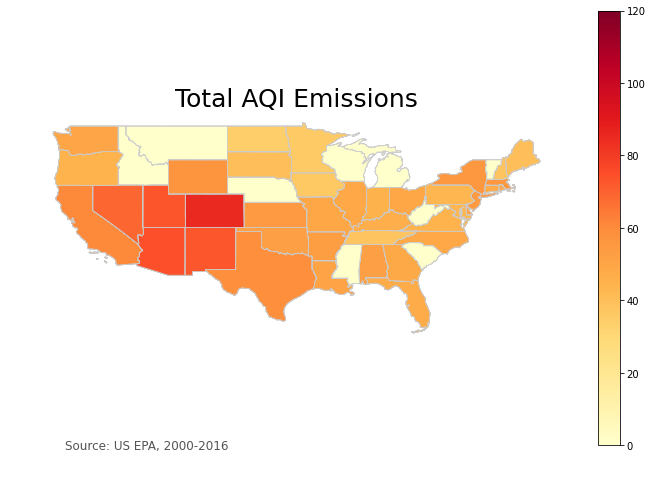

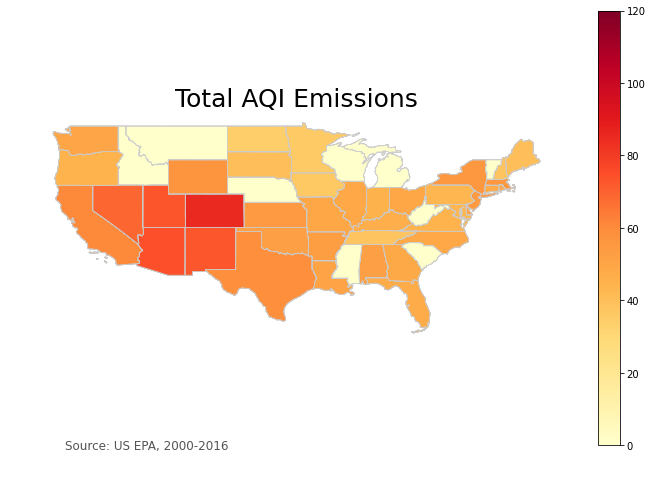

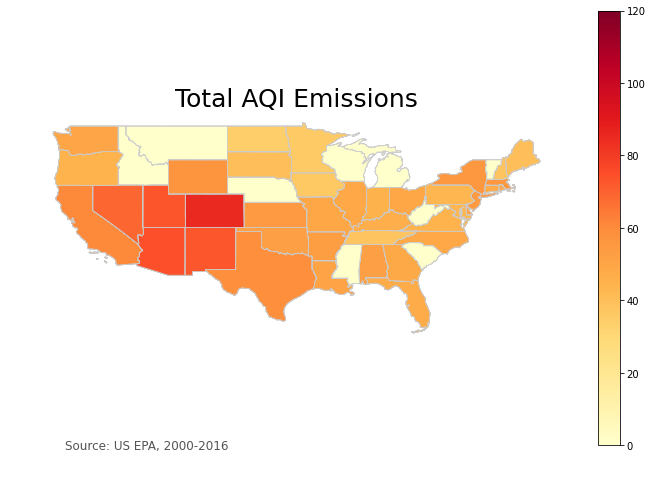

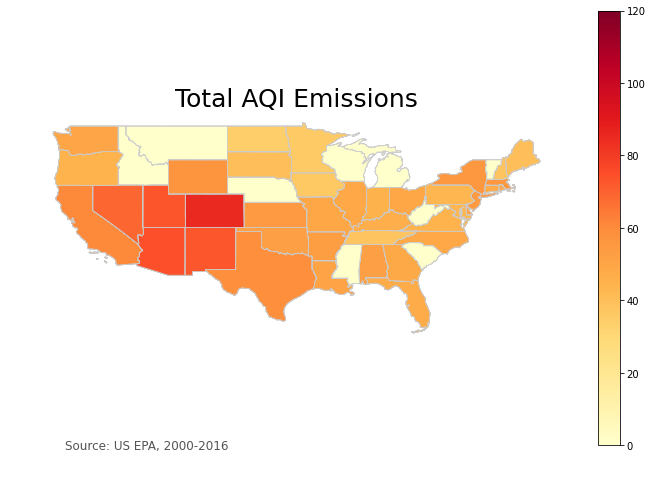

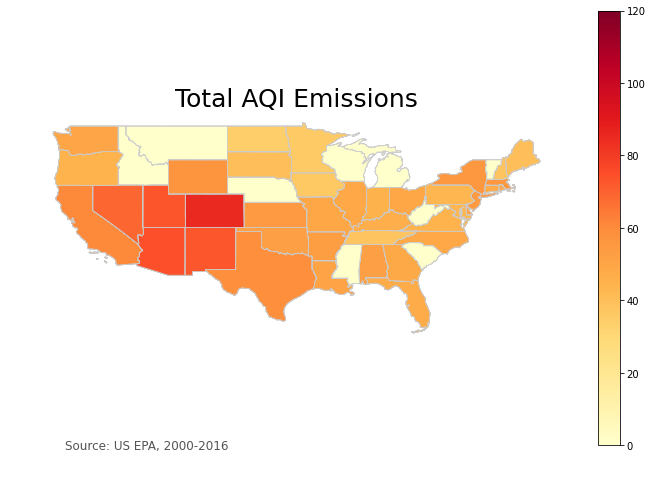

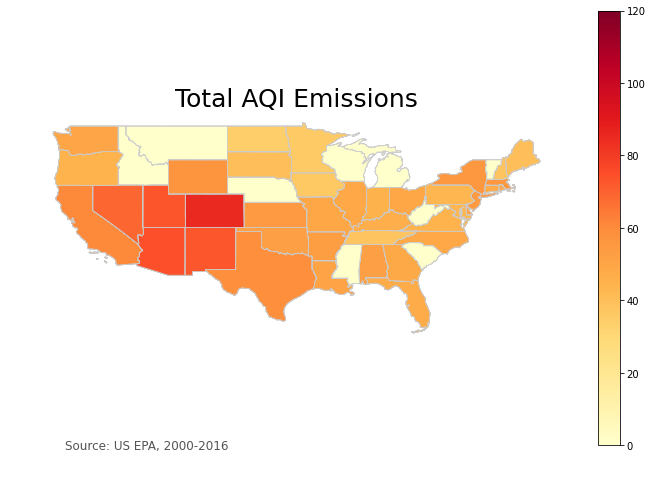

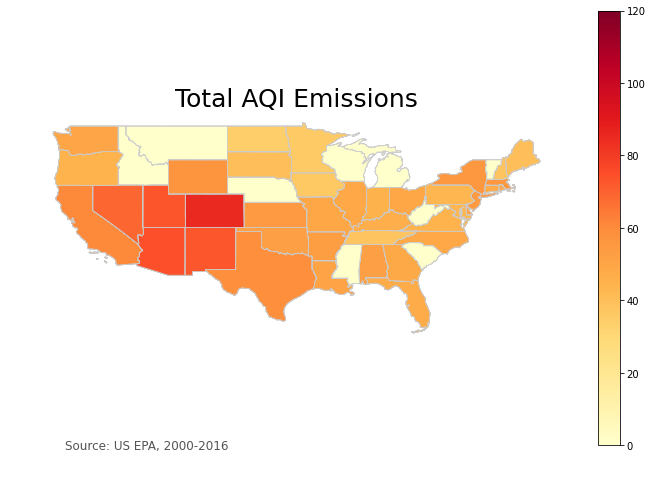

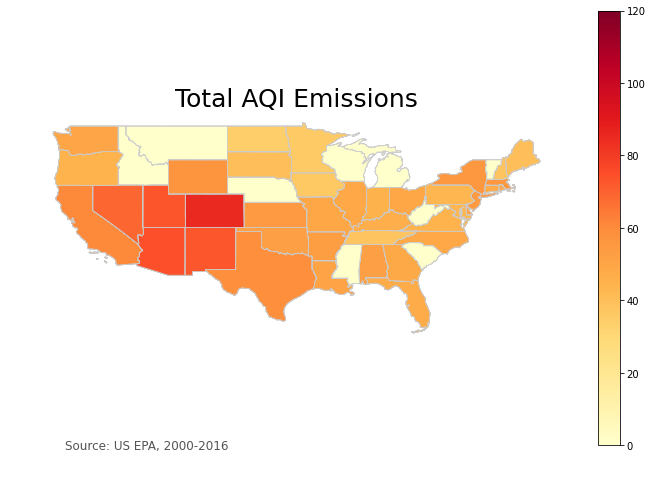

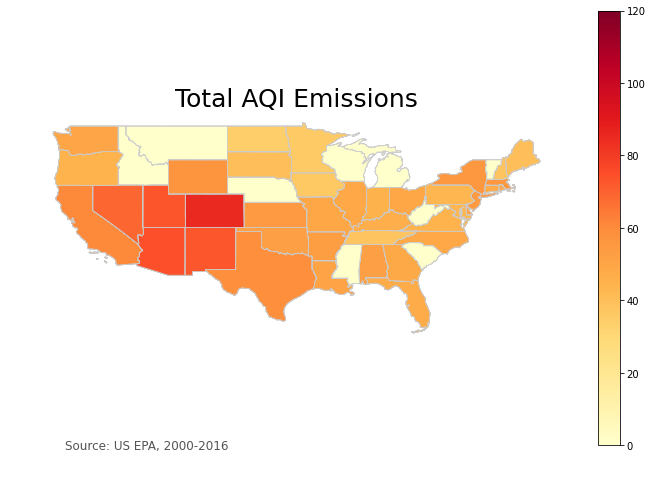

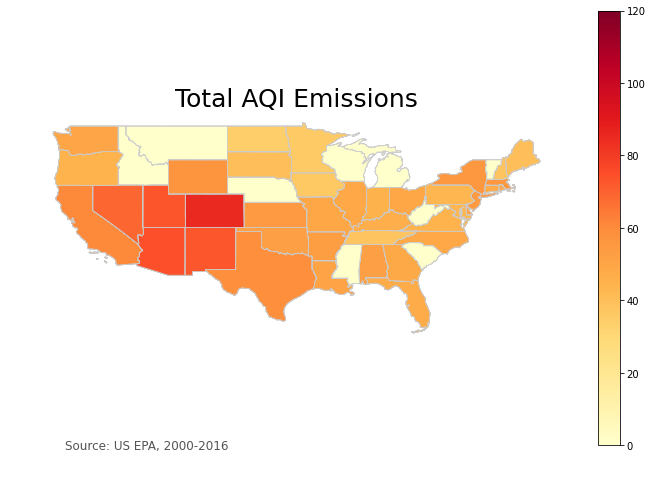

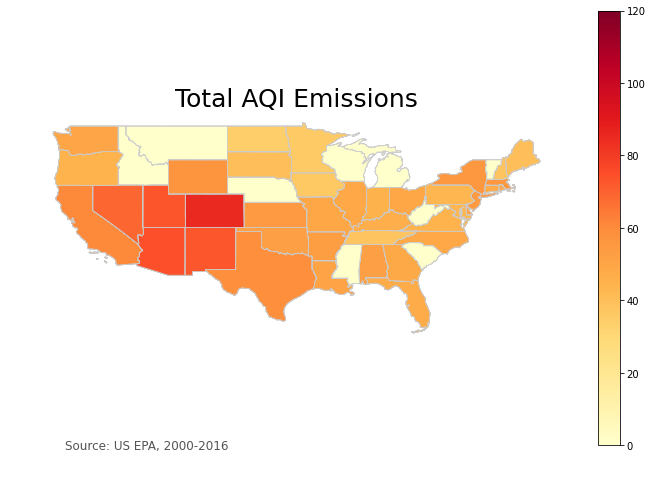

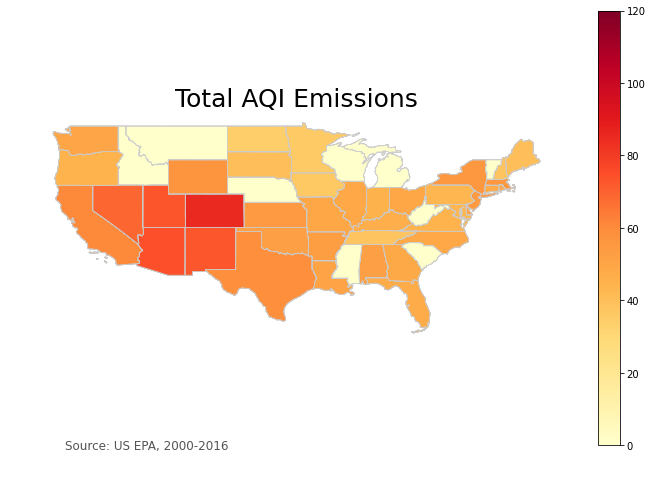

In [143]:
for i in range(1,13):
    plot_month(df2015, i, 'Total AQI')

In [130]:
df2015['Total AQI'].unique()

array([ 48.        ,   0.        ,  63.92857143,  64.71428571,
        94.78571429,  75.55172414,  71.03225806,  75.32258065,
        70.13333333,  63.06451613,  55.8       ,  51.87096774,
        71.53333333,  81.5060241 ,  87.66666667,  92.71111111,
        89.69767442,  90.06666667,  64.91397849,  81.41935484,
        70.9       ,  63.47674419,  74.53333333,  73.56451613,
        58.03225806,  54.03571429,  57.64516129,  56.96666667,
        63.06666667,  55.26666667,  55.5483871 ,  69.        ,
        78.26666667,  61.09677419,  52.4       ,  52.35483871,
        60.42705015,  67.34849734,  74.78713745,  76.06638655,
        61.45692029,  71.53159986,  52.00676263,  63.51843068,
        72.88658793,  67.49725936,  65.97547594,  59.71259166,
        81.07526882,  78.80555556,  89.91111111,  84.39285714,
        76.47727273, 103.8974359 ,  85.68817204,  98.75903614,
        90.98823529,  74.25274725,  76.48863636,  83.7826087 ,
        54.01724138,  63.5       ,  62.93650794,  64.33

In [133]:
def scale(param):
    cmax = param.max()
    cmin = param.min()
    dt = 1e-5
    cg = min((50-cmin)/(cmax-cmin)+dt,1.0)
    cy = min((100-cmin)/(cmax-cmin)+dt,1.0)
    co = min((150-cmin)/(cmax-cmin)+dt,1.0)
    cr = min((200-cmin)/(cmax-cmin)+dt,1.0)
    cp = min((300-cmin)/(cmax-cmin)+dt,1.0)
    cm = min((500-cmin)/(cmax-cmin)+dt,1.0)

    colorcode = [cg,cy,co,cr,cp,cm]
    colors = ['green','yellow','orange','red','purple','maroon']
    scl = []
    prev = 0
    for i in range(len(colorcode)):
        scl.extend([[prev,colors[i]],[colorcode[i],colors[i]]])
        prev=colorcode[i]
        if colorcode[i]==1.0: break
    
    return scl